In [1]:
from __future__ import division

In [100]:
from datetime import datetime, timedelta

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [3]:
tx_data = pd.read_csv('OnlineRetail.csv',encoding="ISO-8859-1")

In [4]:
tx_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [6]:
tx_data["InvoiceDate"] = pd.to_datetime(tx_data["InvoiceDate"])

In [7]:
tx_uk = tx_data.query("Country == 'United Kingdom'").reset_index(drop=True)

In [8]:
tx_user = pd.DataFrame(tx_uk["CustomerID"].unique())

In [10]:
tx_user.columns = ["CustomerID"]

# Recency

In [11]:
tx_max_purchase = tx_uk.groupby("CustomerID").InvoiceDate.max().reset_index()

In [12]:
tx_max_purchase.head(10)

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:17:00
1,12747.0,2011-12-07 14:34:00
2,12748.0,2011-12-09 12:20:00
3,12749.0,2011-12-06 09:56:00
4,12820.0,2011-12-06 15:12:00
5,12821.0,2011-05-09 15:51:00
6,12822.0,2011-09-30 10:04:00
7,12823.0,2011-09-26 07:35:00
8,12824.0,2011-10-11 12:49:00
9,12826.0,2011-12-07 10:25:00


In [13]:
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']

In [23]:
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days

In [24]:
tx_max_purchase.head()

,CustomerID,MaxPurchaseDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,0
3,12749.0,2011-12-06 09:56:00,3
4,12820.0,2011-12-06 15:12:00,2


In [25]:
tx_user = pd.merge(tx_user, tx_max_purchase[['CustomerID','Recency']], on='CustomerID')

In [26]:
tx_user.head()

,CustomerID,Recency
0,17850.0,301
1,13047.0,31
2,13748.0,95
3,15100.0,329
4,15291.0,25


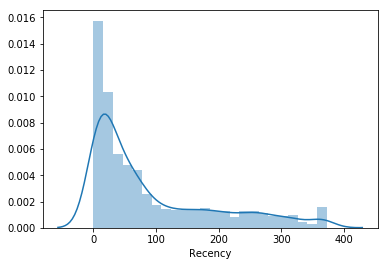

In [27]:
sns.distplot(tx_user['Recency'])

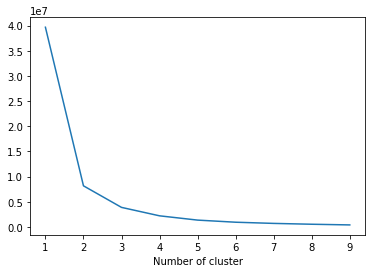

In [28]:
from sklearn.cluster import KMeans


sse={}
tx_recency = tx_user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [46]:
tx_recency

,Recency,clusters
0,301,1
1,31,0
2,95,8
3,329,1
4,25,0
5,7,3
6,15,3
7,0,3
8,2,3
9,87,5


In [29]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])

In [30]:
tx_user.head()

,CustomerID,Recency,RecencyCluster
0,17850.0,301,2
1,13047.0,31,1
2,13748.0,95,3
3,15100.0,329,2
4,15291.0,25,1


In [31]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final


In [32]:
tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)

In [33]:
tx_user.head(10)

,CustomerID,Recency,RecencyCluster
0,17850.0,301,0
1,15100.0,329,0
2,18074.0,373,0
3,16250.0,260,0
4,13747.0,373,0
5,17908.0,373,0
6,16583.0,373,0
7,18085.0,329,0
8,17968.0,373,0
9,14729.0,373,0


In [34]:
a = tx_user.groupby("RecencyCluster")["Recency"].mean().reset_index()

In [35]:
a

,RecencyCluster,Recency
0,0,304.393305
1,1,184.625000
2,2,77.679245
3,3,17.488205


In [36]:
a = a.sort_values(by="Recency",ascending=False).reset_index(drop=True)

In [37]:
a

,RecencyCluster,Recency
0,0,304.393305
1,1,184.625000
2,2,77.679245
3,3,17.488205


In [38]:
a['index'] = a.index

In [39]:
a

,RecencyCluster,Recency,index
0,0,304.393305,0
1,1,184.625000,1
2,2,77.679245,2
3,3,17.488205,3


In [40]:
b = pd.merge(tx_user,a[['RecencyCluster','index']],on="RecencyCluster")

In [41]:
b.head(10)

,CustomerID,Recency,RecencyCluster,index
0,17850.0,301,0,0
1,15100.0,329,0,0
2,18074.0,373,0,0
3,16250.0,260,0,0
4,13747.0,373,0,0
5,17908.0,373,0,0
6,16583.0,373,0,0
7,18085.0,329,0,0
8,17968.0,373,0,0
9,14729.0,373,0,0


In [43]:
  b = b.drop(["RecencyCluster"],axis=1)
  b = b.rename(columns={"index":"RecencyCluster"})

In [45]:
b.head(10)

,CustomerID,Recency,RecencyCluster
0,17850.0,301,0
1,15100.0,329,0
2,18074.0,373,0
3,16250.0,260,0
4,13747.0,373,0
5,17908.0,373,0
6,16583.0,373,0
7,18085.0,329,0
8,17968.0,373,0
9,14729.0,373,0


# Frequency

In [47]:
tx_frequency = tx_uk.groupby("CustomerID").InvoiceDate.count().reset_index()

In [59]:
tx_frequency.columns = ['CustomerID','Frequency']

In [60]:
tx_user = pd.merge(tx_user,tx_frequency, on="CustomerID")

In [63]:
tx_user = tx_user.drop("InvoiceDate",axis=1)

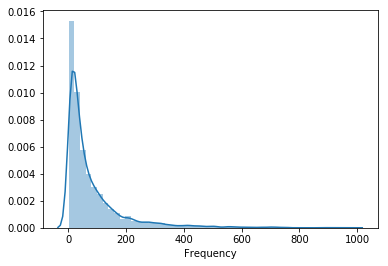

In [64]:
sns.distplot(tx_user.query("Frequency < 1000")['Frequency'])

In [67]:
sse ={}
tx_frequency = tx_user[["Frequency"]]

In [71]:
for i in range(1,10):
    kmeans = KMeans(i,max_iter=1000).fit(tx_frequency)
    sse[i] = kmeans.inertia_

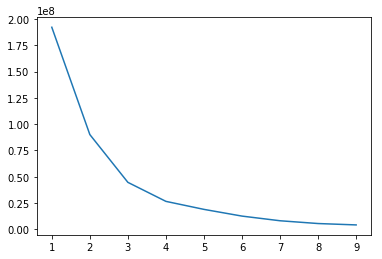

In [72]:
plt.plot(list(sse.keys()),list(sse.values()))
plt.show()

In [73]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])

In [74]:
tx_user.head(10)

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,17850.0,301,0,312,3
1,15100.0,329,0,6,0
2,18074.0,373,0,13,0
3,16250.0,260,0,24,0
4,13747.0,373,0,1,0
5,17908.0,373,0,58,0
6,16583.0,373,0,14,0
7,18085.0,329,0,29,0
8,17968.0,373,0,85,0
9,14729.0,373,0,71,0


In [88]:
tx_user = order_cluster("FrequencyCluster","Frequency",tx_user,True)

In [89]:
tx_user.head()


,CustomerID,Recency,RecencyCluster,Frequency,Revenue,RevenueCluster,FrequencyCluster
0,17850.0,301,0,312,5288.63,1,1
1,14688.0,7,3,359,5107.38,1,1
2,13767.0,1,3,399,16945.71,1,1
3,15513.0,30,3,314,14520.08,1,1
4,14849.0,21,3,392,7904.28,1,1


# Monetory Value

In [78]:
tx_uk["Revenue"] = tx_uk["UnitPrice"]*tx_uk["Quantity"]

In [79]:
tx_revenue = tx_uk.groupby('CustomerID').Revenue.sum().reset_index()

In [80]:
tx_user = pd.merge(tx_user, tx_revenue, on='CustomerID')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

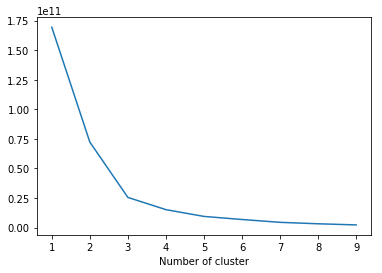

In [81]:
sse={}
tx_revenue = tx_user[['Revenue']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_revenue)
    tx_revenue["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [82]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])

In [83]:
tx_user.head(10)

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,17850.0,301,0,312,2,5288.63,3
1,15808.0,305,0,210,2,3724.77,0
2,13047.0,31,3,196,2,3079.10,0
3,14688.0,7,3,359,2,5107.38,3
4,16029.0,38,3,274,2,50992.61,2
5,13408.0,1,3,501,2,27487.41,2
6,13767.0,1,3,399,2,16945.71,3
7,13448.0,16,3,199,2,3465.67,0
8,15513.0,30,3,314,2,14520.08,3
9,17920.0,3,3,696,2,4204.10,0


In [86]:
tx_user = order_cluster('RevenueCluster','Revenue',tx_user,True)

In [87]:
tx_user.head(10)

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,17850.0,301,0,312,2,5288.63,1
1,14688.0,7,3,359,2,5107.38,1
2,13767.0,1,3,399,2,16945.71,1
3,15513.0,30,3,314,2,14520.08,1
4,14849.0,21,3,392,2,7904.28,1
5,12921.0,3,3,741,2,16389.74,1
6,13468.0,1,3,306,2,5656.75,1
7,17690.0,29,3,258,2,4748.45,1
8,17017.0,2,3,268,2,8574.11,1
9,15601.0,10,3,414,2,6745.36,1


In [90]:
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']

In [91]:
tx_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,Revenue,RevenueCluster,FrequencyCluster,OverallScore
0,17850.0,301,0,312,5288.63,1,1,2
1,14688.0,7,3,359,5107.38,1,1,5
2,13767.0,1,3,399,16945.71,1,1,5
3,15513.0,30,3,314,14520.08,1,1,5
4,14849.0,21,3,392,7904.28,1,1,5


In [92]:
tx_user.groupby("OverallScore")['Recency','Frequency','Revenue'].mean()

,Recency,Frequency,Revenue
OverallScore,,,
0,304.584388,21.995781,303.339705
1,185.362989,32.596085,498.087546
2,78.991304,46.963043,868.082991
3,20.689610,68.419590,1091.416414
4,14.892617,271.755034,3607.097114
5,9.662162,373.290541,9136.946014
6,7.740741,876.037037,22777.914815
7,1.857143,1272.714286,103954.025714
8,1.333333,5917.666667,42177.930000


In [96]:
tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
tx_user.loc[tx_user['OverallScore']>4,'Segment'] = 'High-Value' 

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [97]:
tx_user.head(10)

,CustomerID,Recency,RecencyCluster,Frequency,Revenue,RevenueCluster,FrequencyCluster,OverallScore,Segment
0,17850.0,301,0,312,5288.63,1,1,2,Low-Value
1,14688.0,7,3,359,5107.38,1,1,5,High-Value
2,13767.0,1,3,399,16945.71,1,1,5,High-Value
3,15513.0,30,3,314,14520.08,1,1,5,High-Value
4,14849.0,21,3,392,7904.28,1,1,5,High-Value
5,12921.0,3,3,741,16389.74,1,1,5,High-Value
6,13468.0,1,3,306,5656.75,1,1,5,High-Value
7,17690.0,29,3,258,4748.45,1,1,5,High-Value
8,17017.0,2,3,268,8574.11,1,1,5,High-Value
9,15601.0,10,3,414,6745.36,1,1,5,High-Value


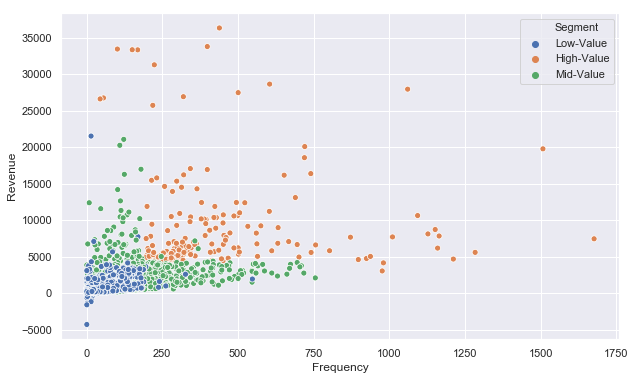

In [101]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Frequency",y="Revenue",hue="Segment",data=tx_user.query("Revenue < 50000 and Frequency < 2000"))

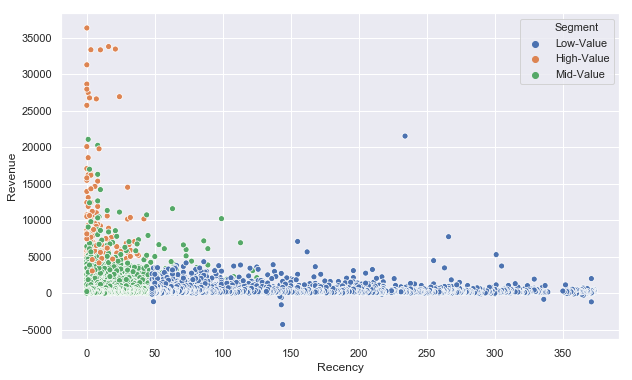

In [103]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Recency",y="Revenue",hue="Segment",data=tx_user.query("Revenue < 50000 and Frequency < 2000"))

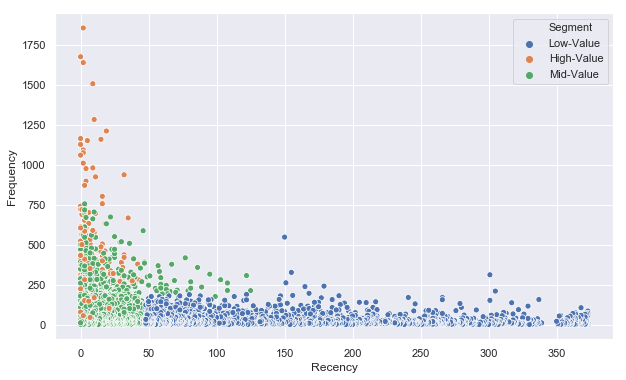

In [105]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Recency",y="Frequency",hue="Segment",data=tx_user.query("Frequency < 2000"))